In [1]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime

import numpy as np
np.seterr(all='raise')

from lpf.data import load_model_dicts
from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [2]:
device = "cuda:0"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 500000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [3]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [4]:
LPF_REPO_HOME = ".."
model_dicts = load_model_dicts(pjoin(LPF_REPO_HOME, "population/init_pop_axyridis/"))

In [5]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(model_dicts)
params = LiawModel.parse_params(model_dicts)

In [6]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [ ]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    period_output=10000,
    dpath_model=dpath_output,
    dpath_morph=dpath_output,
    dpath_pattern=dpath_output,
    verbose=1
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

- [Iteration #1] elapsed time: 1.17665e-01 sec.
- [Iteration #10000] elapsed time: 1.76003e+01 sec.
- [Iteration #20000] elapsed time: 1.67945e+01 sec.
- [Iteration #30000] elapsed time: 1.73265e+01 sec.
- [Iteration #40000] elapsed time: 1.77631e+01 sec.
- [Iteration #50000] elapsed time: 1.72868e+01 sec.
- [Iteration #60000] elapsed time: 1.82180e+01 sec.
- [Iteration #70000] elapsed time: 1.77610e+01 sec.
- [Iteration #80000] elapsed time: 1.71354e+01 sec.
- [Iteration #90000] elapsed time: 1.71550e+01 sec.
- [Iteration #100000] elapsed time: 1.69841e+01 sec.
- [Iteration #110000] elapsed time: 1.67876e+01 sec.
- [Iteration #120000] elapsed time: 1.64977e+01 sec.
- [Iteration #130000] elapsed time: 1.66250e+01 sec.
- [Iteration #140000] elapsed time: 1.66140e+01 sec.
- [Iteration #150000] elapsed time: 1.66076e+01 sec.
- [Iteration #160000] elapsed time: 1.66321e+01 sec.
- [Iteration #170000] elapsed time: 1.68774e+01 sec.
- [Iteration #180000] elapsed time: 1.67790e+01 sec.
- [Iter

In [8]:
from lpf.visualization import merge_multiple

In [ ]:
arr_ladybird = model.colorize(thr_color=0.5)
imgs = []

for i in range(arr_ladybird.shape[0]):
    img_ladybird, img_pattern = model.create_image(i, arr_ladybird)
    imgs.append(img_ladybird)


img_output = merge_multiple(imgs=imgs,
                            n_cols=4,
                            ratio_resize=2.0,
                            text_format="morph = ",
                            font_size=32)

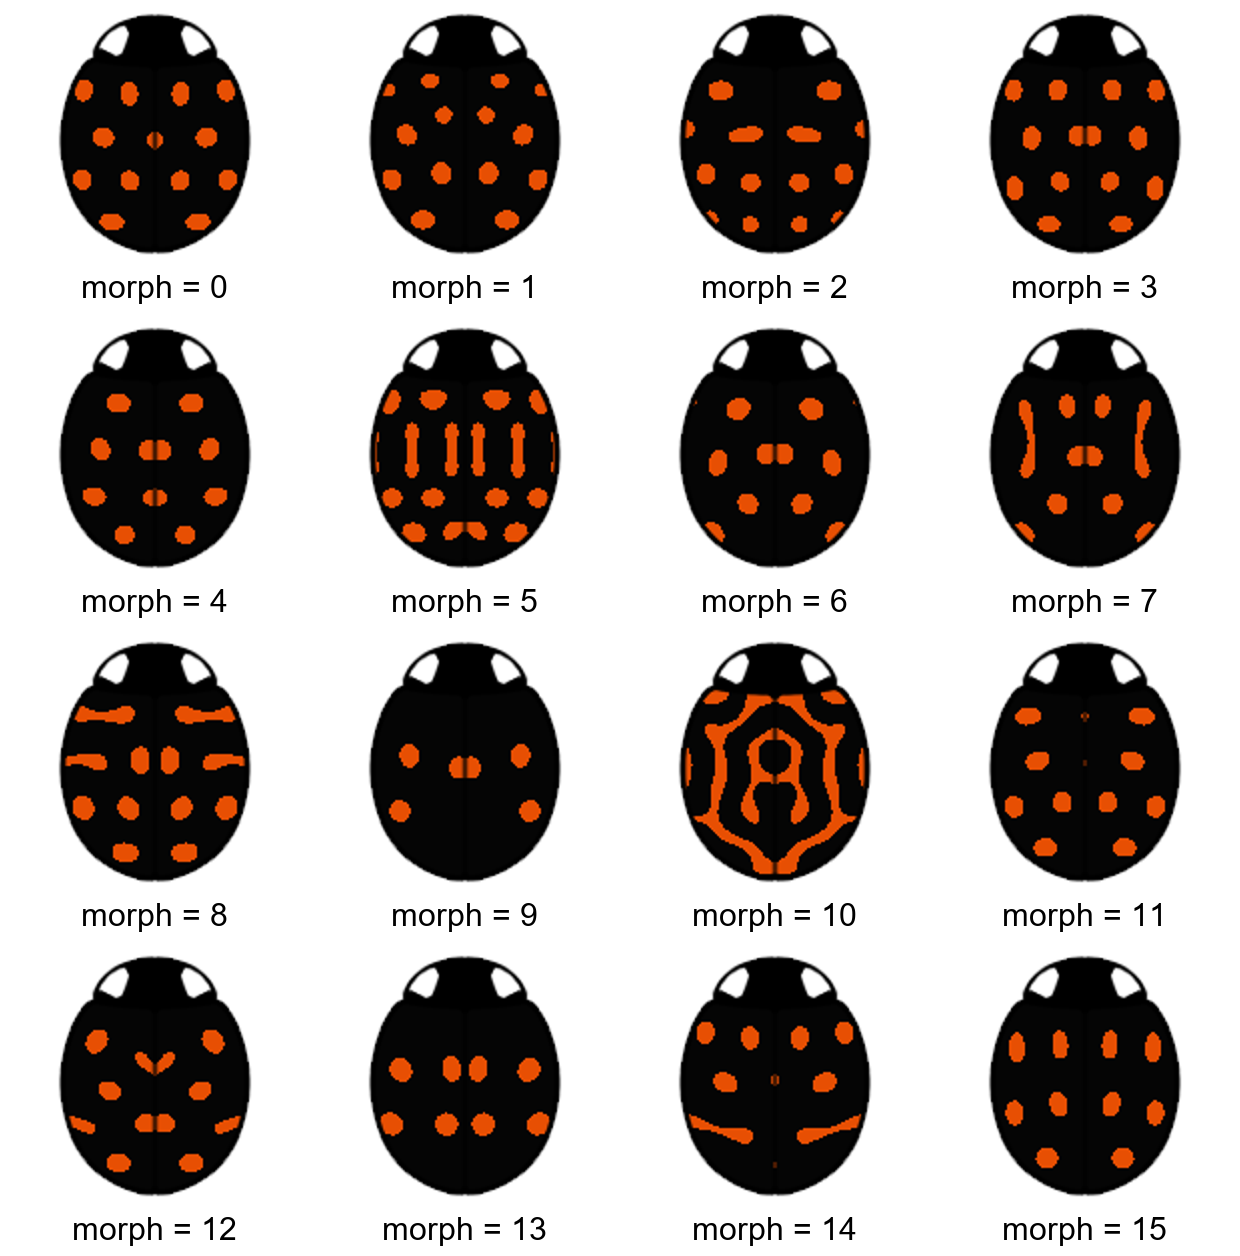

In [10]:
img_output

In [ ]:
img_output.save(pjoin(dpath_output, "ladybirds_merged.png"), dpi=(600, 600))